In [2]:
import pandas as pd

uri_filmes = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes= pd.read_csv(uri_filmes)
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos= filmes.generos.str.get_dummies()
dados_dos_filmes= pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados= scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
from sklearn.cluster import KMeans

In [6]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'grupos {modelo.labels_}')

grupos [0 0 1 ... 1 0 1]


In [7]:
print(generos.columns)
print(modelo.cluster_centers_)
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.69901148  1.7418909   1.24593264  1.13693595 -0.07725885
  -0.29458242 -0.21099529 -0.5829261   0.94573389 -0.09492563 -0.25103418
   0.57092353  0.17475205 -0.1611419  -0.2786648   0.56003406 -0.24078948
  -0.045687    0.01339258]
 [ 0.03875296 -0.25741153 -0.31869239 -0.21804396 -0.18013209  0.23916279
  -0.13161431  0.13832932  0.18880339 -0.18771843 -0.08950887 -0.32444611
  -0.11629403  0.02536135 -0.21461011  0.20540404 -0.21527713 -0.477953
   0.06227679  0.02366507]
 [-0.05917995  0.2018329  -0.29809532 -0.23781336 -0.26375986 -0.54526834
   0.51082595 -0.21139912 -0.10413413 -0.12538994  0.28149807  0.96218295
  -0.06832066 -0.17220049  0.63338245 -0.33556227  0.1841509   1.33676228
  -

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d42c12f60>,
      dtype=object)

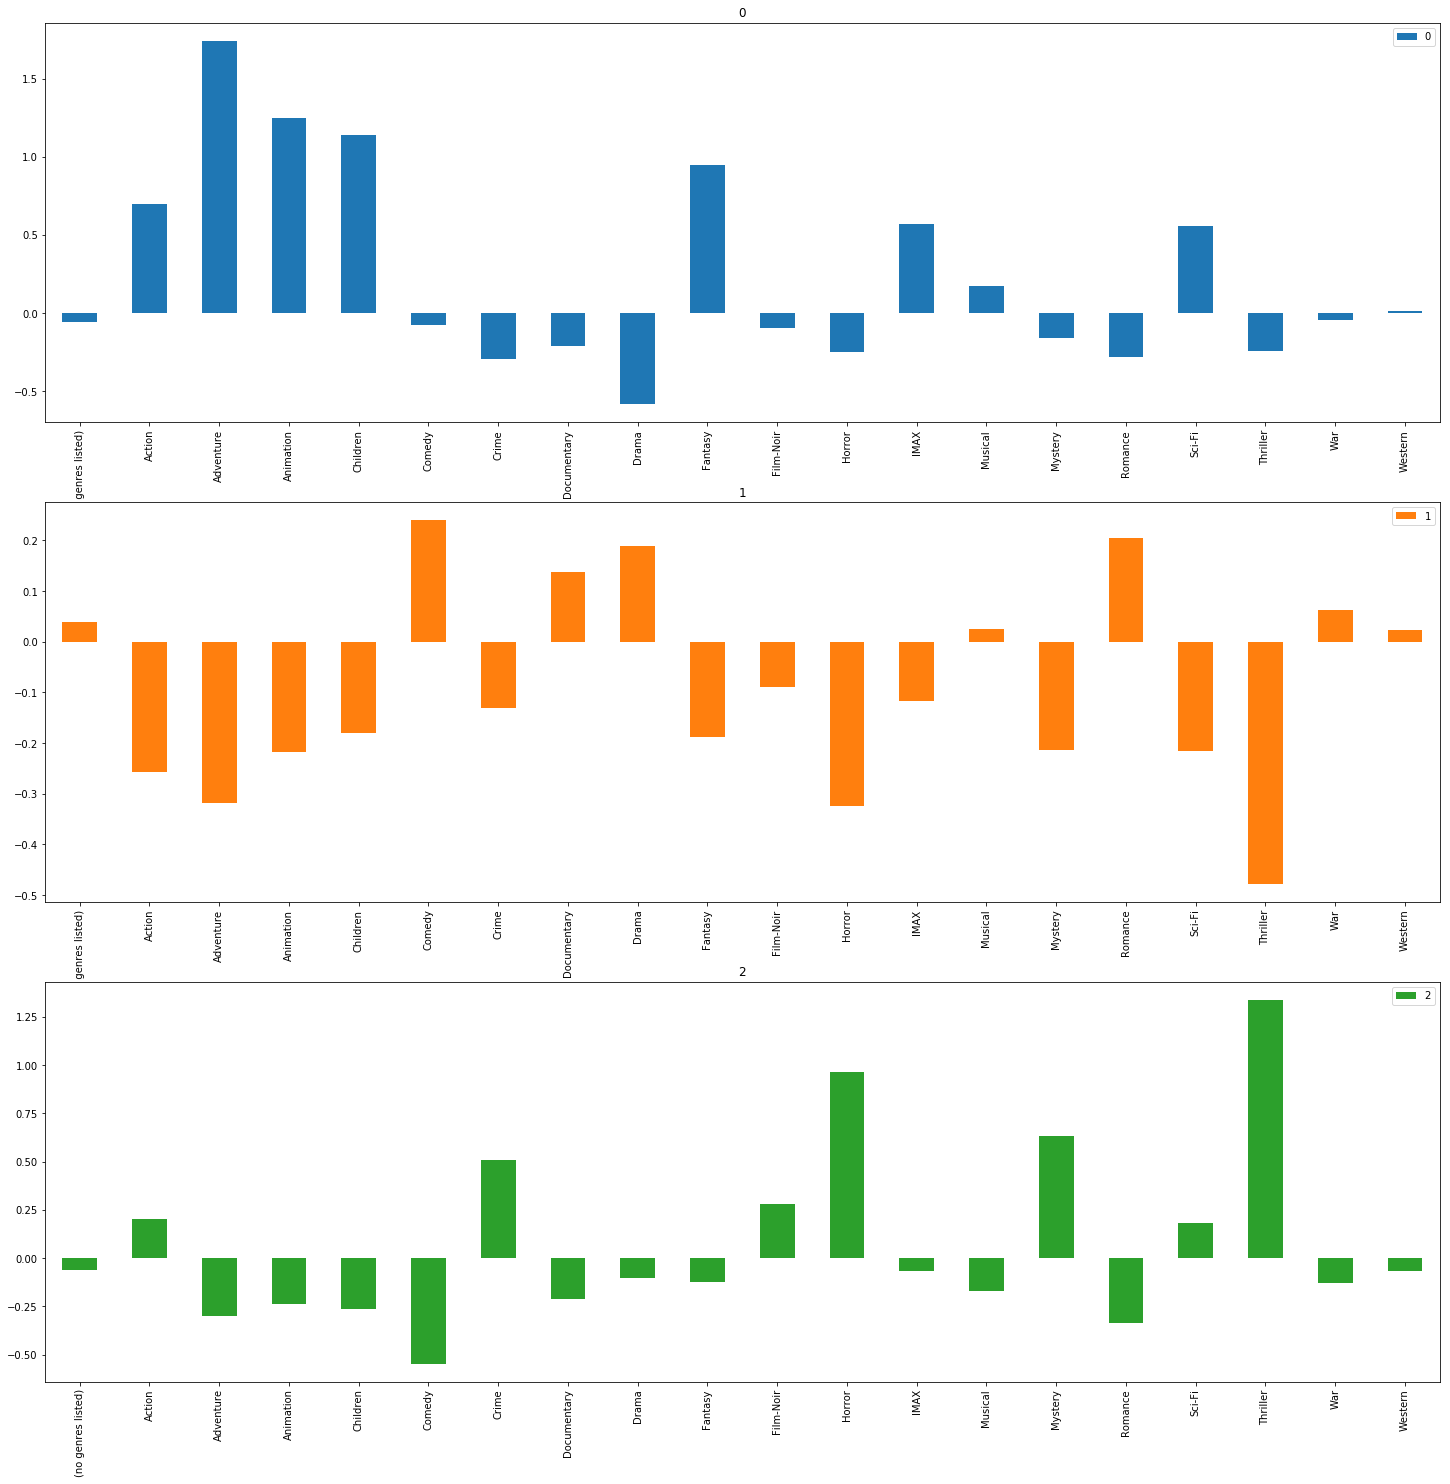

In [8]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False)

In [9]:
grupo= 0
filtro= modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3938,5539,Care Bears Movie II: A New Generation (1986),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3521,4812,SpaceCamp (1986),Adventure|Sci-Fi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3997,5638,Godzilla vs. Mothra (Mosura tai Gojira) (1964),Action|Adventure|Fantasy|Sci-Fi,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8806,130520,Home (2015),Adventure|Animation|Children|Comedy|Fantasy|Sc...,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7725,90522,Johnny English Reborn (2011),Adventure|Comedy|Thriller,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9535,172547,Despicable Me 3 (2017),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7607,86864,Mothra (Mosura) (1961),Adventure|Fantasy|Sci-Fi,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4096,5872,Die Another Day (2002),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2596,3471,Close Encounters of the Third Kind (1977),Adventure|Drama|Sci-Fi,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1611,2153,"Avengers, The (1998)",Action|Adventure,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# from sklearn.datasets import make_blobs

# dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
# dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
# dados.head()

# import matplotlib.pyplot as plt

# plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [0]:
# modelo = KMeans(n_clusters=3)
# grupos = modelo.fit_predict(dados)
# plt.scatter(x=dados.coluna1, y=dados.coluna2,
#            c=grupos, cmap='viridis')

In [0]:
# centroides = modelo.cluster_centers_
# plt.scatter(dados.coluna1, dados.coluna2,
#             c=grupos,
#            cmap='viridis')
# plt.scatter(centroides[:, 0], centroides[:, 1],
#            marker='X', s=169, linewidths=5,
#            color='g', zorder=8)

In [0]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE()
visualizacao= tsne.fit_transform(generos_escalados)
visualizacao

array([[ 59.125603 ,  -6.89259  ],
       [ 15.347529 , -43.44441  ],
       [ 29.226225 , -27.828365 ],
       ...,
       [ -9.071853 ,  -6.025409 ],
       [  5.465253 , -27.618868 ],
       [ 27.749153 ,   2.4765244]], dtype=float32)

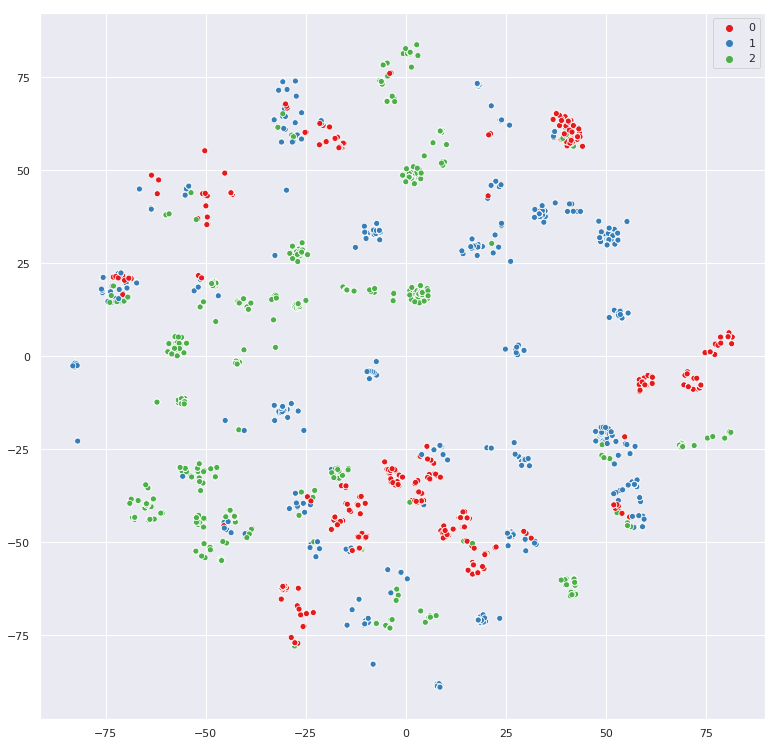

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,13)})

sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], 
                hue= modelo.labels_, 
                palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d3ffb4438>,
      dtype=object)

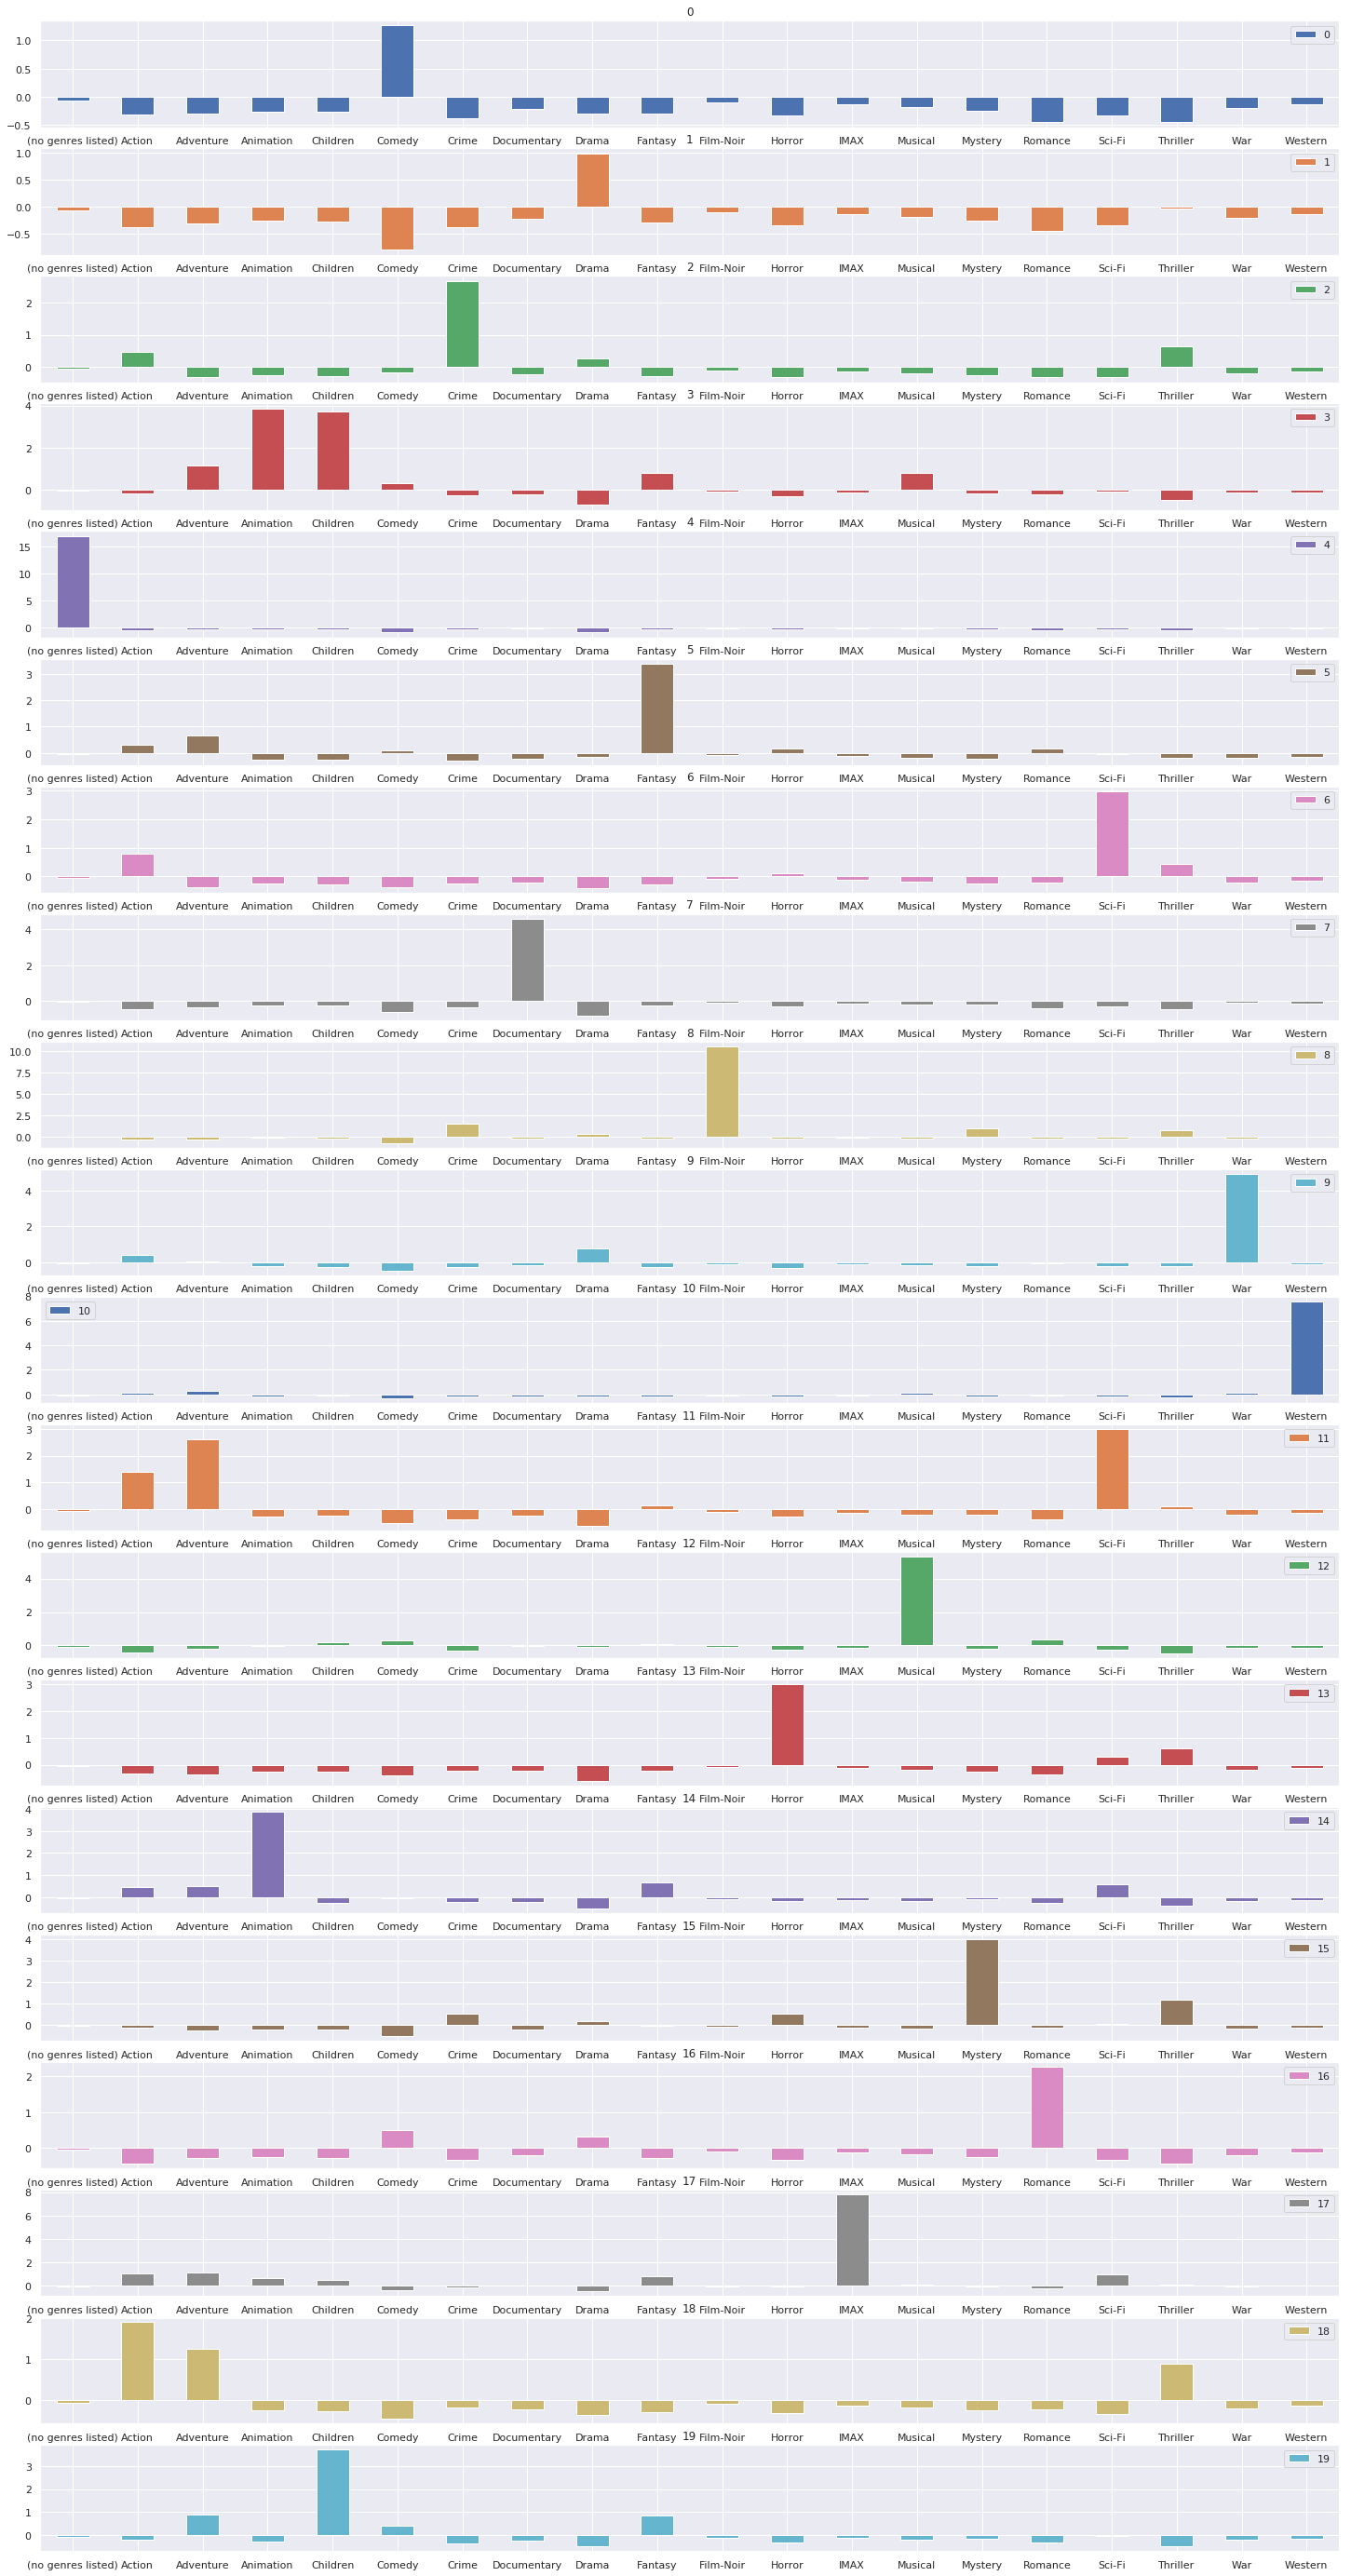

In [16]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos= pd.DataFrame(modelo.cluster_centers_, columns= generos.columns)
grupos.transpose().plot.bar(subplots = True,
                           figsize=(25,50),
                           sharex=False,
                           rot=0)

In [17]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9451,167732,A Street Cat Named Bob (2016),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9397,164375,All Roads Lead to Rome (2016),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7512,83910,"Dilemma, The (2011)",Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
219,255,"Jerky Boys, The (1995)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7857,93831,American Reunion (American Pie 4) (2012),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2395,3177,Next Friday (2000),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4828,7206,Mon Oncle (My Uncle) (1958),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4515,6688,Autumn Spring (Babí léto) (2001),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6091,42009,Cheaper by the Dozen 2 (2005),Adventure|Comedy,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
363,419,"Beverly Hillbillies, The (1993)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [19]:
kmeans(20, generos_escalados)

[20, 55770.31013470465]

In [20]:
resultado=[kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1,41)]
resultado
  

[[1, 194840.0],
 [2, 179484.10364334713],
 [3, 166516.8100457482],
 [4, 157547.81272165608],
 [5, 147761.39874685864],
 [6, 138984.23788810172],
 [7, 128727.7918444061],
 [8, 118441.27914933718],
 [9, 110646.0222528742],
 [10, 100751.6348604903],
 [11, 94354.99869808473],
 [12, 86635.44412284505],
 [13, 79725.86604287829],
 [14, 73395.35451640746],
 [15, 68187.14087854479],
 [16, 63785.9623277988],
 [17, 61112.03041613935],
 [18, 57772.444380213055],
 [19, 57722.66125710167],
 [20, 55320.417825043136],
 [21, 53614.20061487036],
 [22, 52266.339871816366],
 [23, 50611.25486557675],
 [24, 49349.91837469818],
 [25, 48892.53048451977],
 [26, 46555.73515131839],
 [27, 46062.82815869626],
 [28, 44966.14227538098],
 [29, 43350.61062902856],
 [30, 42719.83361641614],
 [31, 42125.60045103141],
 [32, 40513.47858435719],
 [33, 40134.50288821968],
 [34, 39513.092862476464],
 [35, 38450.08308542293],
 [36, 37957.58283104687],
 [37, 37703.91152613023],
 [38, 37148.95978033013],
 [39, 35721.3780691442

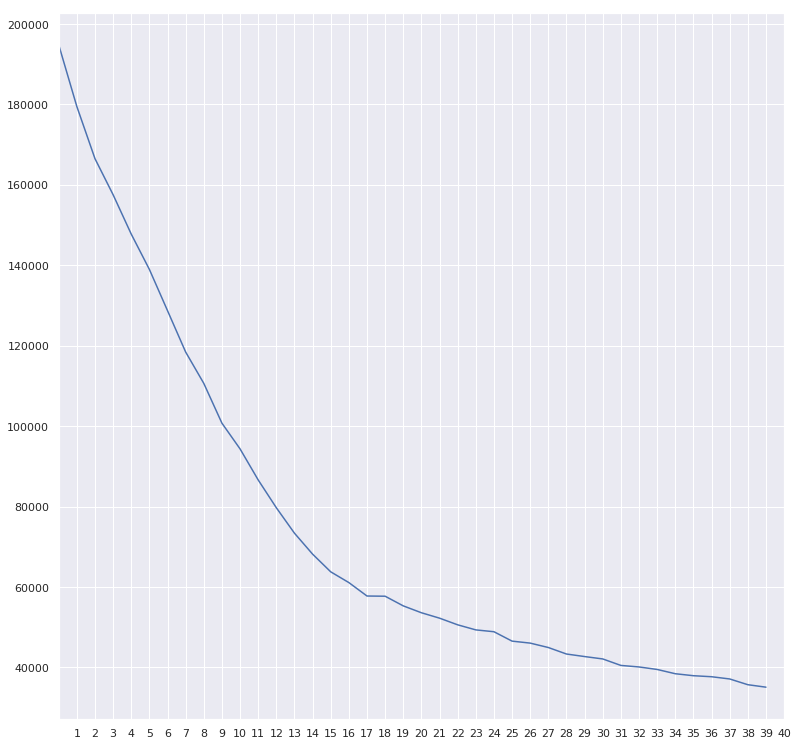

In [21]:
resultado= pd.DataFrame(resultado,
            columns=['grupos', 'inertia'])
resultado.inertia.plot(xticks= resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d3d57bb00>,
      dtype=object)

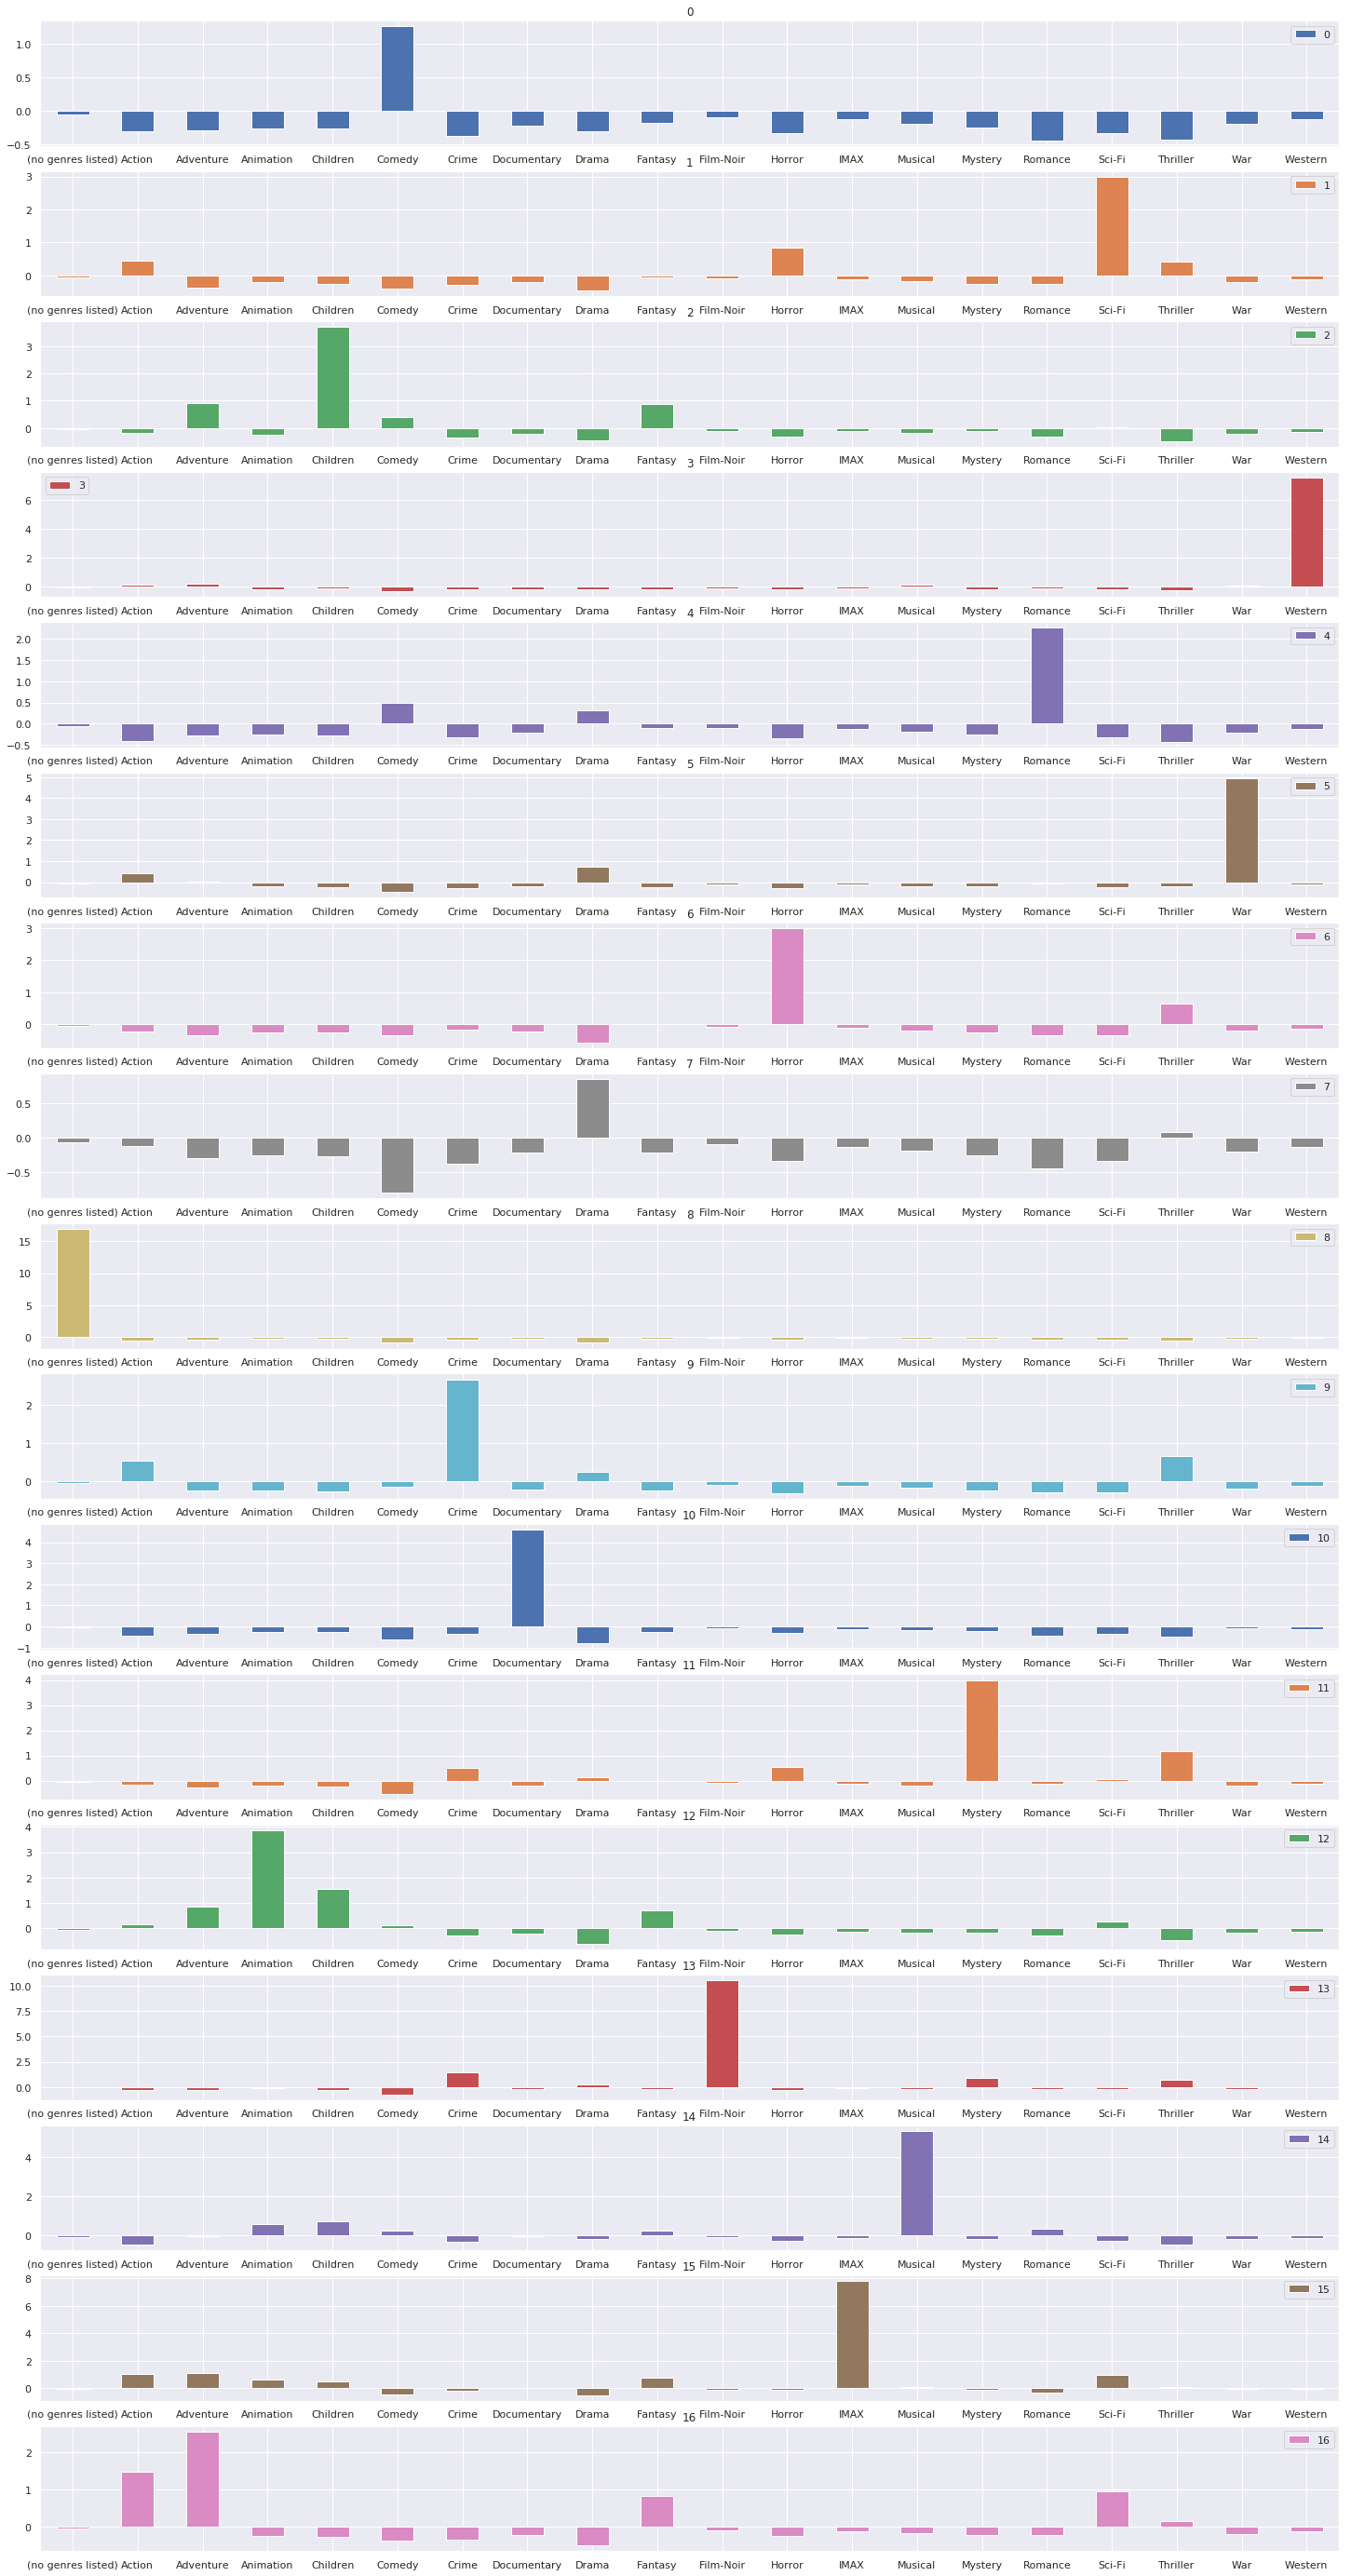

In [22]:
modelo = KMeans(n_clusters=17)#escolhe-se o 17 devido ao elbow method (nesse numero forma um cotovelo)
modelo.fit(generos_escalados)
grupos= pd.DataFrame(modelo.cluster_centers_, columns= generos.columns)
grupos.transpose().plot.bar(subplots = True,
                           figsize=(25,50),
                           sharex=False,
                           rot=0)

In [23]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4160,5990,Pinocchio (2002),Children|Comedy|Fantasy,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9194,150554,The Love Bug (1997),Adventure|Children|Comedy|Fantasy,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6472,52730,It's a Very Merry Muppet Christmas Movie (2002),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5754,31030,I Remember Mama (1948),Children|Drama,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1506,2034,"Black Hole, The (1979)",Children|Sci-Fi,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9233,152658,Santa's Little Helper (2015),Children,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9294,158813,Alice Through the Looking Glass (2016),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6545,54768,Daddy Day Camp (2007),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5975,36289,Asterix & Obelix vs. Caesar (Astérix et Obélix...,Adventure|Children|Comedy|Fantasy,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5473,26198,"Yours, Mine and Ours (1968)",Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
modelo = AgglomerativeClustering(n_clusters= 17)
grupos= modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [26]:
tsne = TSNE()
visualizacao= tsne.fit_transform(generos_escalados)
visualizacao

array([[ 53.533108 , -37.693184 ],
       [ 40.09415  , -38.99405  ],
       [ 27.296432 , -10.383601 ],
       ...,
       [  2.5250826, -16.627949 ],
       [ 60.17167  ,  21.204535 ],
       [  2.9354696,  20.59796  ]], dtype=float32)

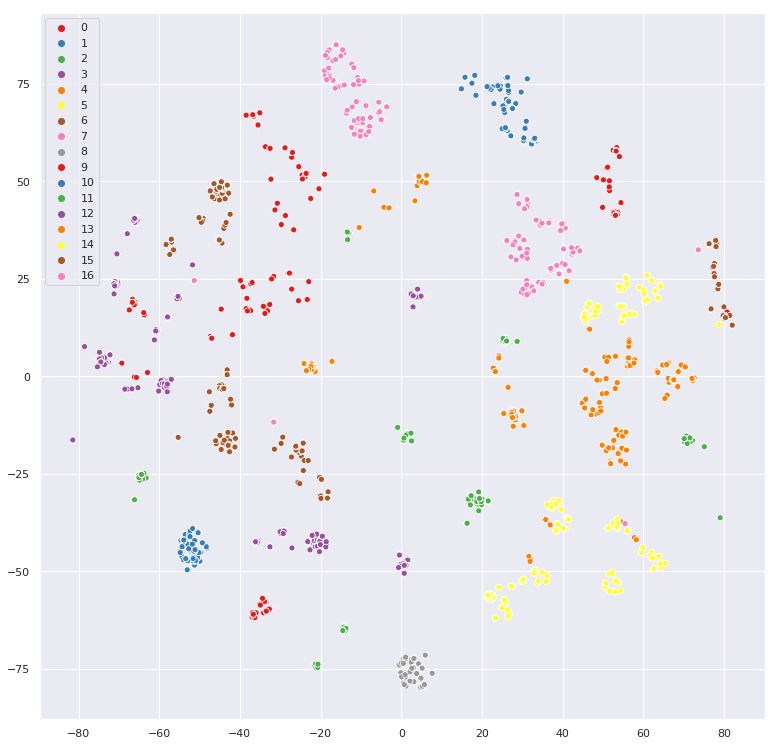

In [27]:
sns.scatterplot(x=visualizacao[:,0],
               y=visualizacao[:,1],
               hue=grupos,
               palette=sns.color_palette('Set1', 17))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d3d01fb70>,
      dtype=object)

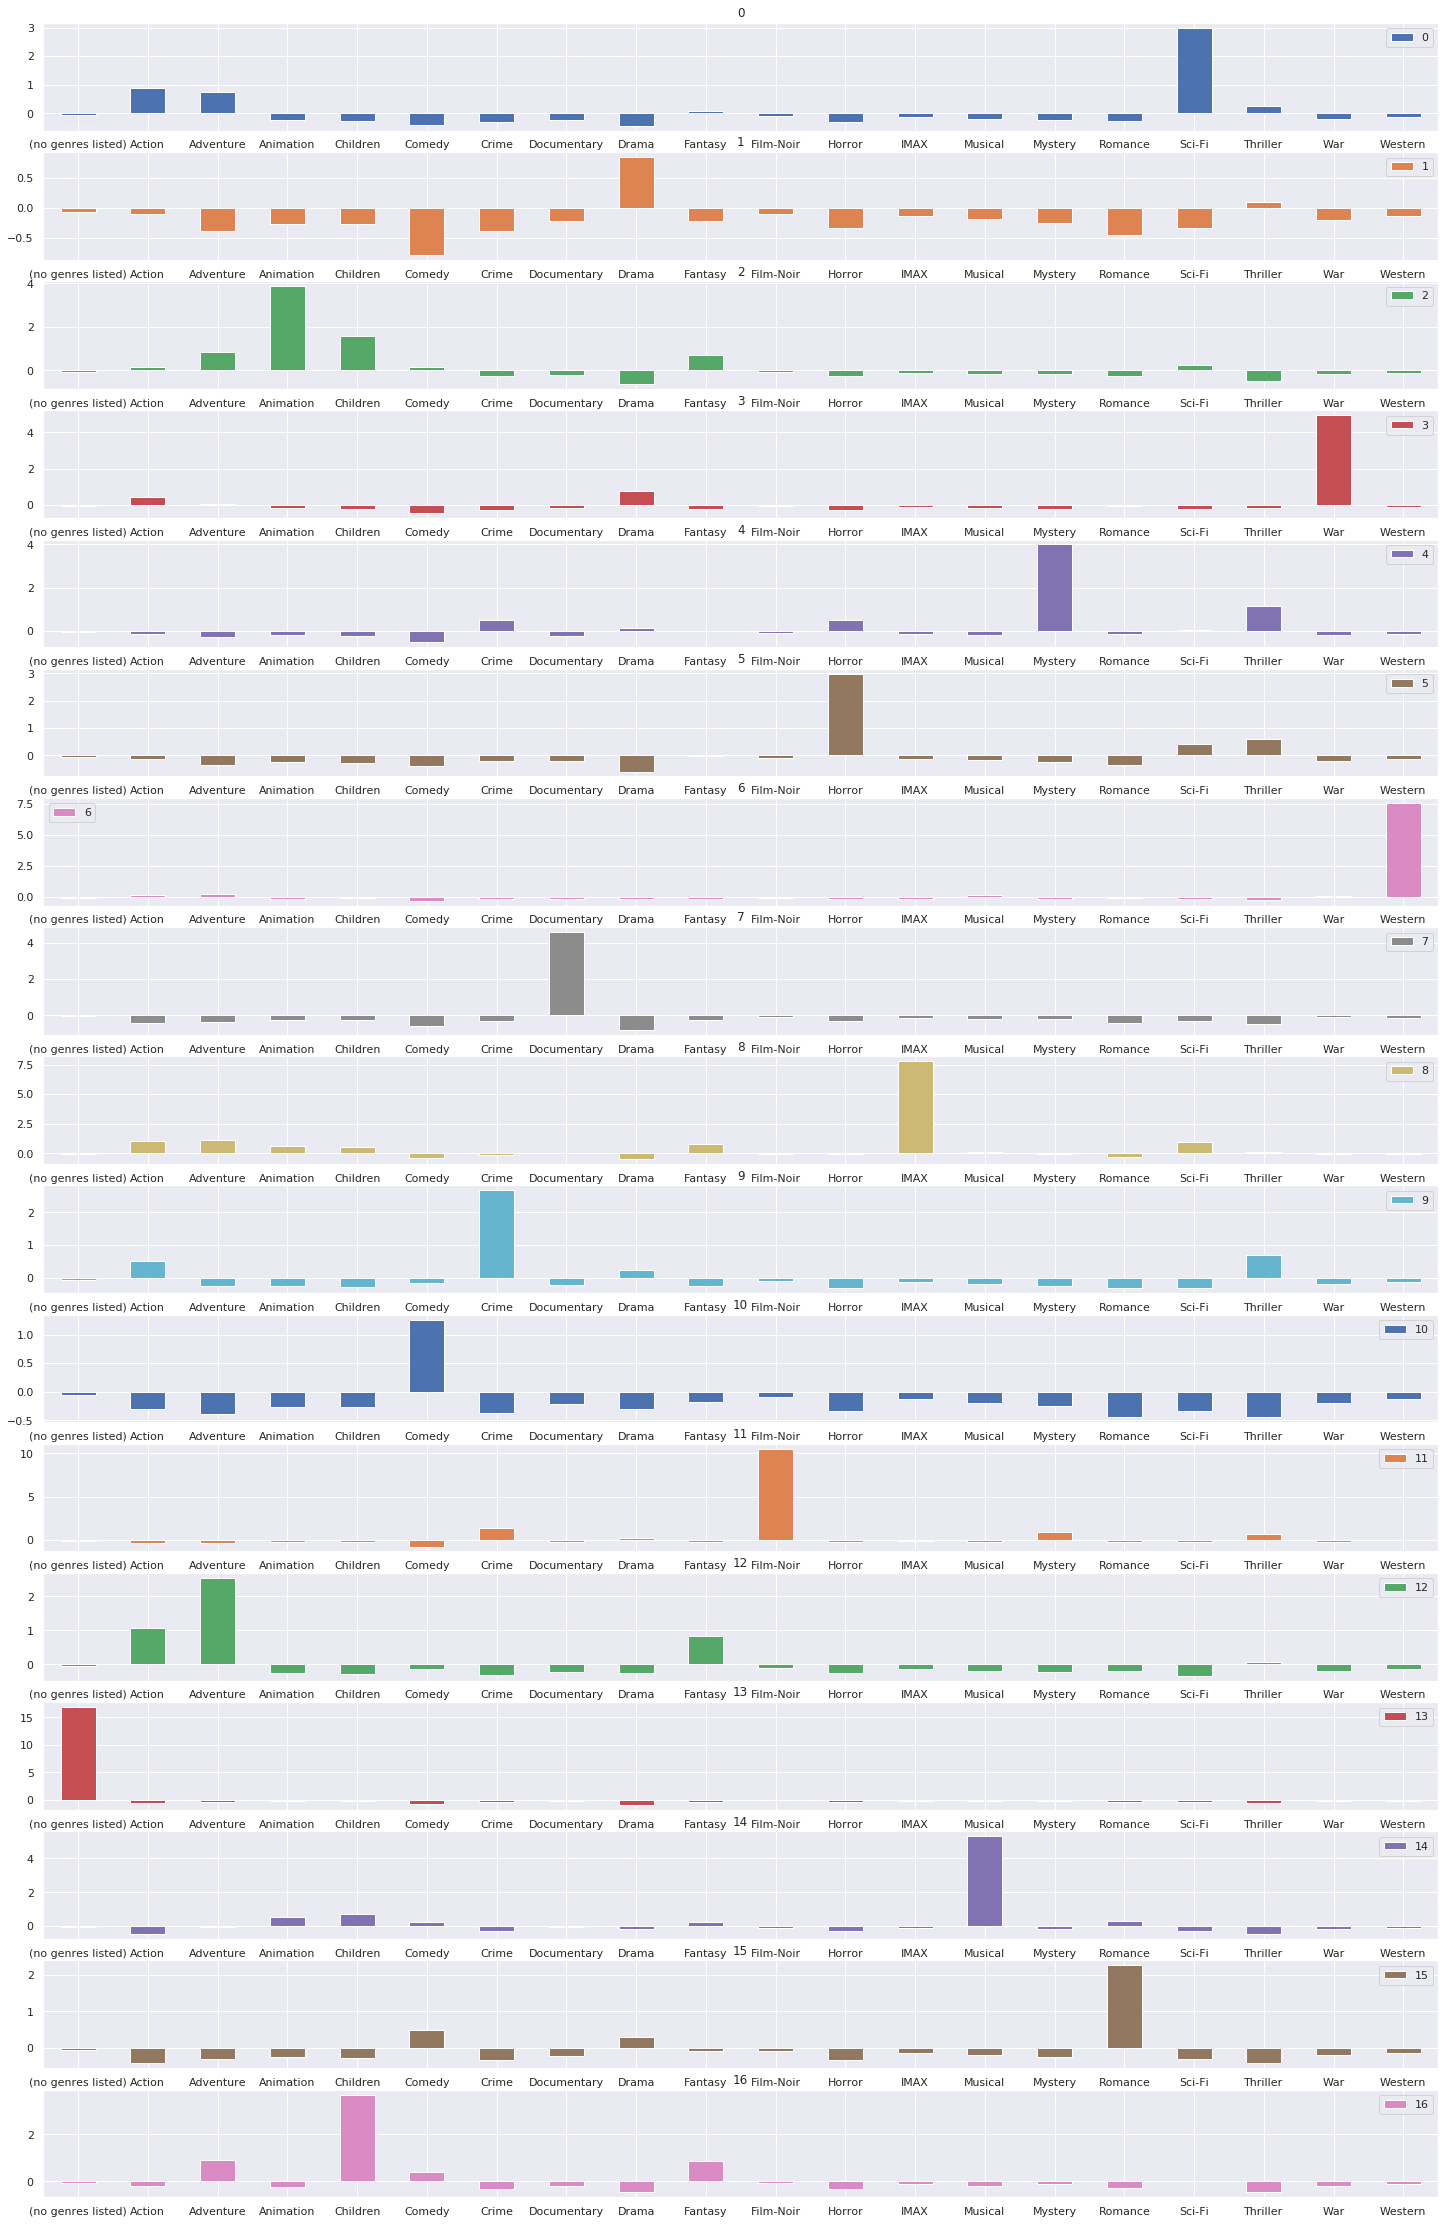

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos= pd.DataFrame(modelo.cluster_centers_, columns= generos.columns)
grupos.transpose().plot.bar(subplots = True,
                           figsize=(25,40),
                           sharex=False,
                           rot=0)

In [29]:
matriz_de_distancia=linkage(grupos)
matriz_de_distancia

array([[ 1.        , 10.        ,  2.41445113,  2.        ],
       [15.        , 17.        ,  2.87955138,  3.        ],
       [ 9.        , 18.        ,  3.27930859,  4.        ],
       [12.        , 19.        ,  3.57423977,  5.        ],
       [ 5.        , 20.        ,  3.7657573 ,  6.        ],
       [ 0.        , 21.        ,  3.87340562,  7.        ],
       [16.        , 22.        ,  4.40940533,  8.        ],
       [ 4.        , 23.        ,  4.64214959,  9.        ],
       [ 2.        , 24.        ,  4.67707328, 10.        ],
       [ 7.        , 25.        ,  5.14200173, 11.        ],
       [ 3.        , 26.        ,  5.22994255, 12.        ],
       [14.        , 27.        ,  5.82206634, 13.        ],
       [ 6.        , 28.        ,  7.85230969, 14.        ],
       [ 8.        , 29.        ,  8.25545984, 15.        ],
       [11.        , 30.        , 10.81429229, 16.        ],
       [13.        , 31.        , 17.06109486, 17.        ]])

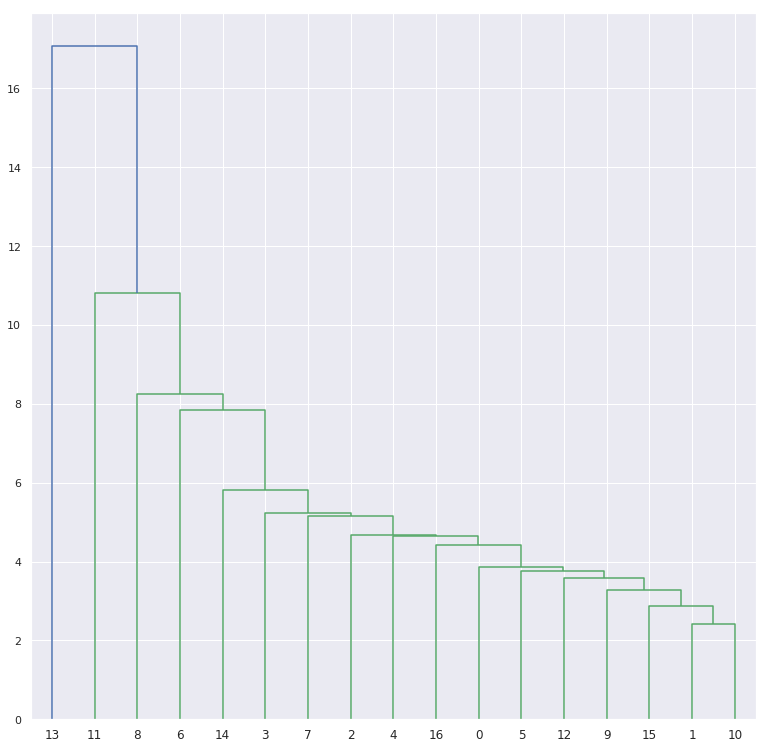

In [30]:
dendrograma= dendrogram(matriz_de_distancia)